<h1 style="font-size: 50px; color: #0059b3; text-align: center;"> TITANIC SURVIVAL PREDICTION </h1>



<style>
  .center-image {
    text-align: center;
  }
</style>

<p class="center-image">
  <img src="ti.png" width="1000" height="800" alt="Your image description">
</p>


<p align='center' >
            
Here I have used Logistic Regression by cross validation.
A machine learning project to predict whether a passenger in titanic disaster survived or not. </p>


Where I get this Dataset is from 
https://www.kaggle.com/c/titanic

<h1 align='center' style="color:#80bfff"> Importing the Dependencies
</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



<h1 align='center' style="font-size: 18px;"> Now I am performing some EDA on the data set </h1>

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h1 style="font-size: 40px; color: #80bfff; text-align: center;"> EDA GRAPHICAL </h1>




<h1 align='center' style="color:#80bfff"> UNIVARIATE ANALYSIS
</h1>



<h1 align='center' style="font-size: 18px;"> HISTOGRAM  </h1>

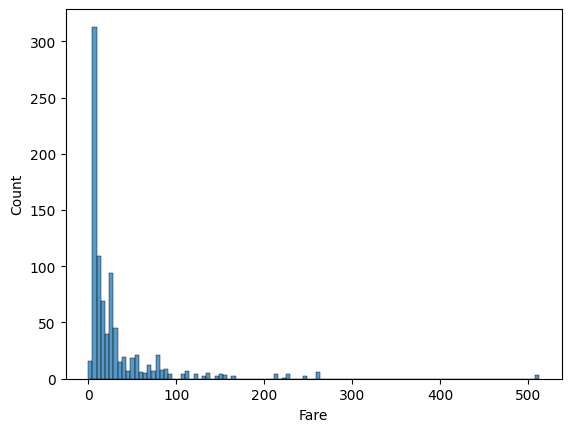

In [9]:
sns.histplot(x="Fare",data=df);

#### <center>KDE PLOT

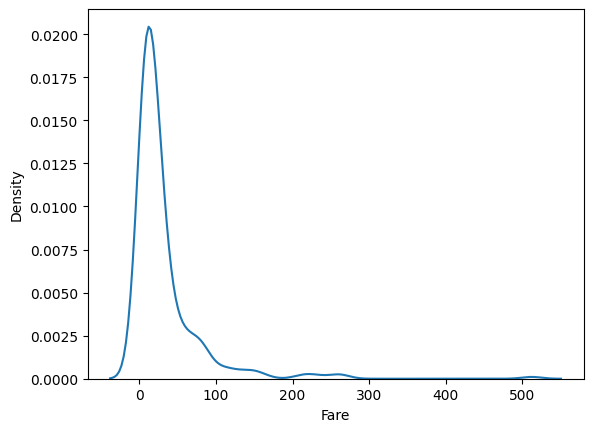

In [10]:
sns.kdeplot(x="Fare",data=df);

#### <center>BOX PLOT

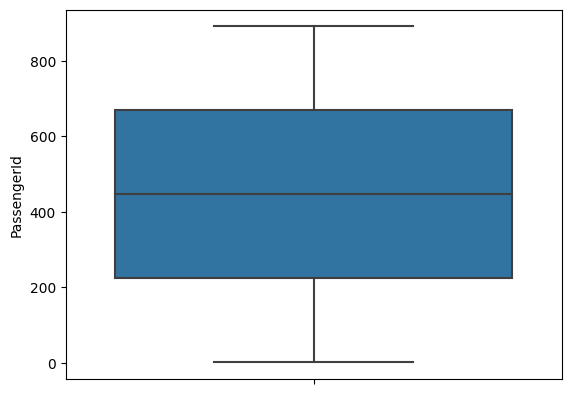

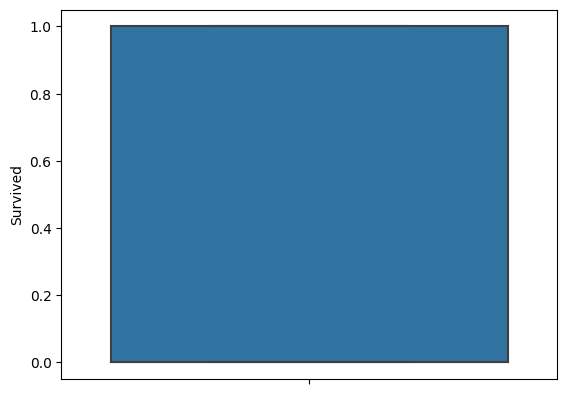

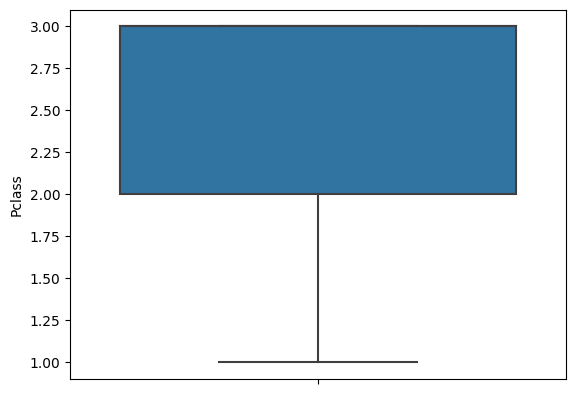

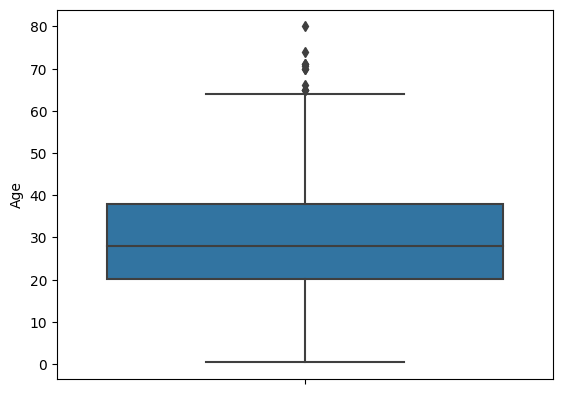

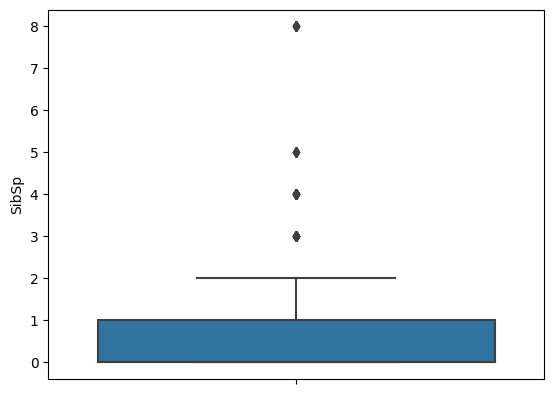

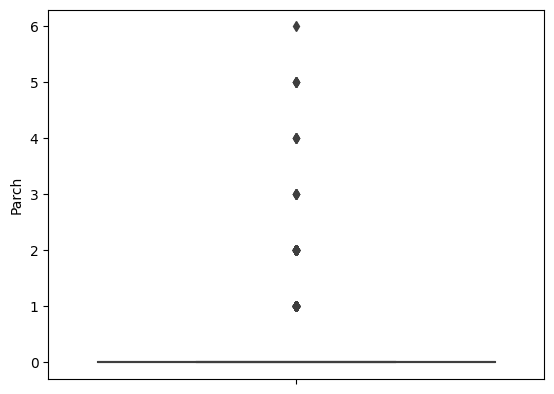

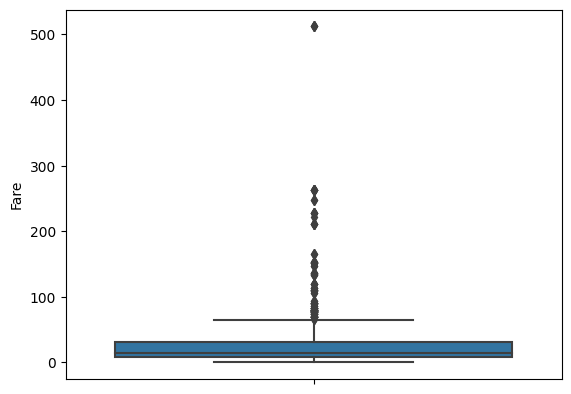

In [11]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i])
    plt.show()


<h1 align='center' style="font-size: 18px;">Treating the outliers   </h1>

In [12]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [13]:
for i in df.columns:
    if df[i].dtype != 'object':
        UL,LL= outlier_limit(df[i])        
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

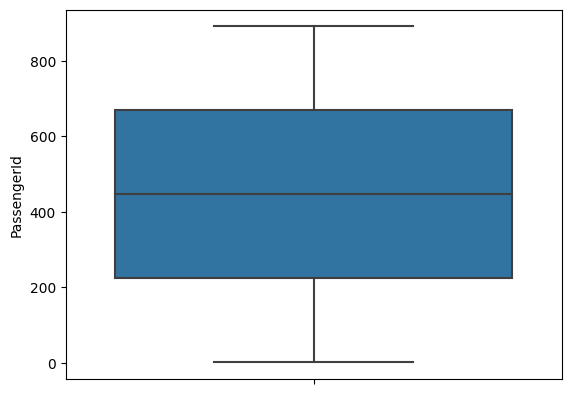

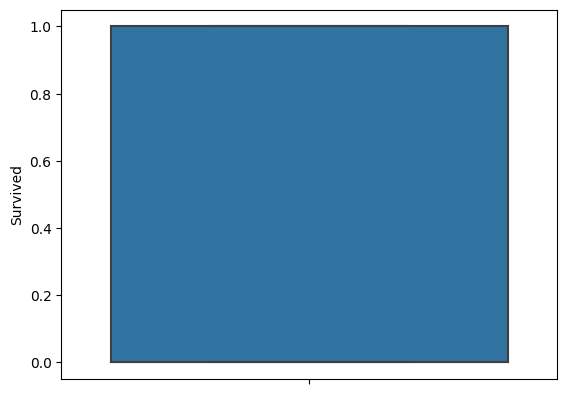

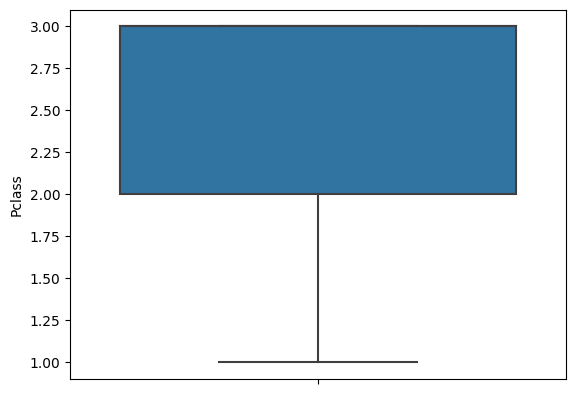

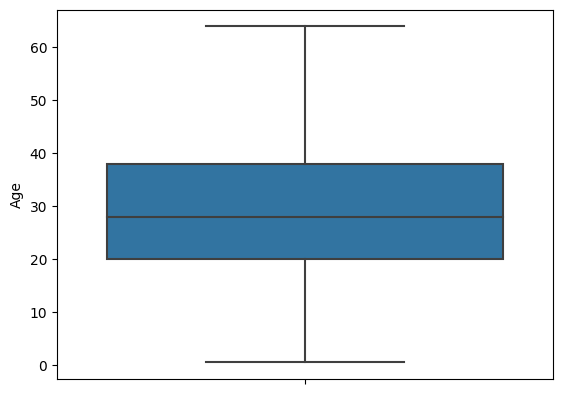

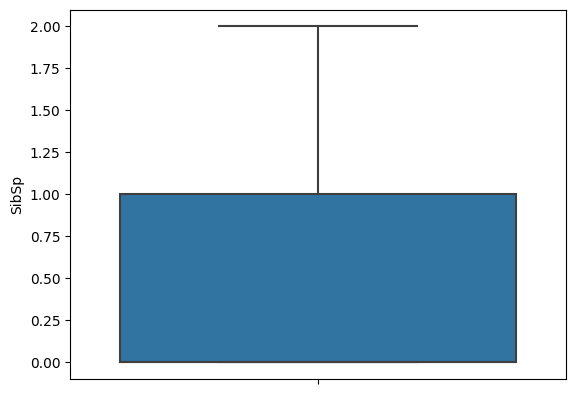

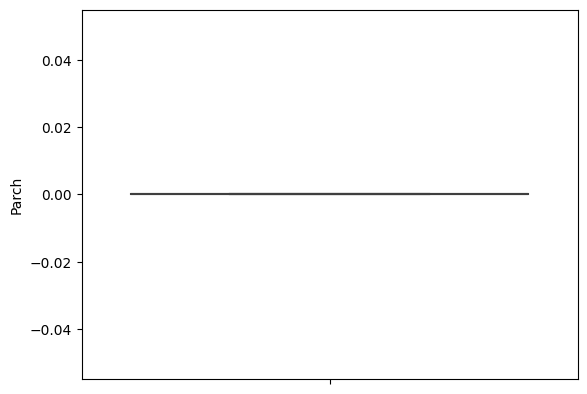

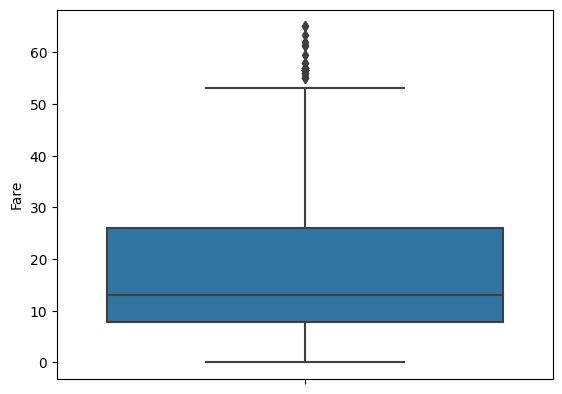

In [14]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show();

In [15]:
df.dropna(inplace=True)

<h1 align='center' style="color:#80bfff"> BIVARIATE ANALYSIS
</h1>



<h1 align='center' style="font-size: 18px;">Bar Plot   </h1>

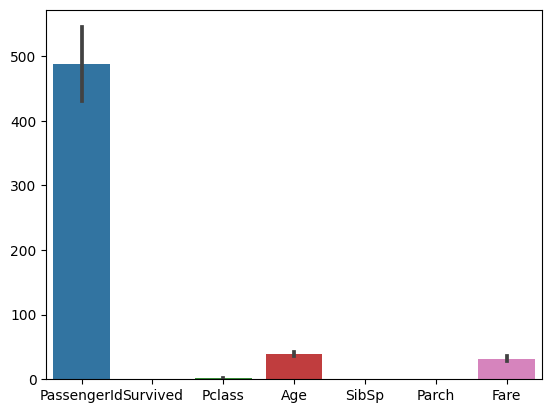

In [16]:
sns.barplot(data=df);


<h1 align='center' style="font-size: 18px;">Pie Chart  </h1>

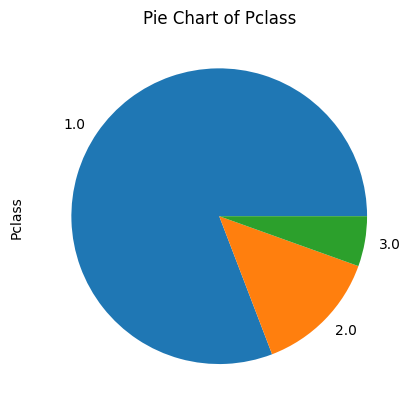

In [56]:
plt.title('Pie Chart of Pclass')
df.Pclass.value_counts().plot.pie();



<h1 align='center' style="color:#80bfff">LABEL ENCODER
</h1>
<h1 align='center' style="font-size: 18px;"> Using label encoder covert object into numerical values </h1>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 3 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  73 non-null     float64
 1   Survived     73 non-null     float64
 2   Pclass       73 non-null     float64
 3   Name         73 non-null     object 
 4   Sex          73 non-null     object 
 5   Age          73 non-null     float64
 6   SibSp        73 non-null     float64
 7   Parch        73 non-null     float64
 8   Ticket       73 non-null     object 
 9   Fare         73 non-null     float64
 10  Cabin        73 non-null     object 
 11  Embarked     73 non-null     object 
dtypes: float64(7), object(5)
memory usage: 7.4+ KB


In [19]:
le = LabelEncoder()

In [20]:
df['Name']=le.fit_transform(df['Name'])
df['Ticket']=le.fit_transform(df['Ticket'])
df["Sex"]=le.fit_transform(df['Sex'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 3 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  73 non-null     float64
 1   Survived     73 non-null     float64
 2   Pclass       73 non-null     float64
 3   Name         73 non-null     int32  
 4   Sex          73 non-null     int32  
 5   Age          73 non-null     float64
 6   SibSp        73 non-null     float64
 7   Parch        73 non-null     float64
 8   Ticket       73 non-null     int32  
 9   Fare         73 non-null     float64
 10  Cabin        73 non-null     object 
 11  Embarked     73 non-null     object 
dtypes: float64(7), int32(3), object(2)
memory usage: 6.6+ KB



<h1 align='center' style="font-size: 18px;"> Droping the PassengerId column as it is not relevant </h1>

In [22]:
df.drop(columns=['PassengerId', 'Ticket'], inplace=True)

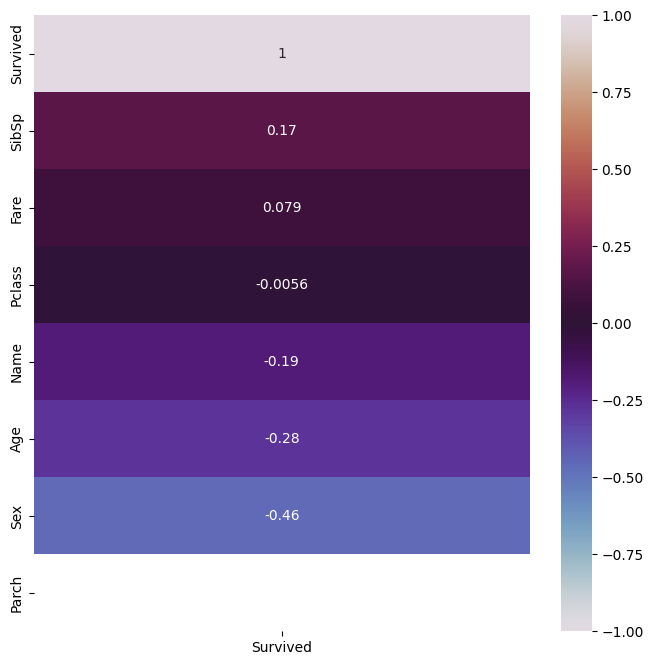

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr()[["Survived"]].sort_values(by="Survived", ascending=False), vmin=-1, vmax=1,annot=True, cmap="twilight");

In [24]:
x = df[['SibSp', 'Fare']].values
y = df[['Survived']].values



<h1 align='center' style="color:#80bfff">Cross validation
</h1>

In [25]:
models={
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [26]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, cv=10, n_jobs=-1)
    print("cross validation model : {}".format(name))
    Average_score = np.mean(scores)
    print("Average score: ", Average_score)
    print("*"*100)

cross validation model : DecisionTreeClassifier
Average score:  0.5196428571428571
****************************************************************************************************
cross validation model : SVC
Average score:  0.575
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Average score:  0.5999999999999999
****************************************************************************************************
cross validation model : LogisticRegression
Average score:  0.5499999999999999
****************************************************************************************************
cross validation model : AdaBoostClassifier
Average score:  0.6142857142857142
****************************************************************************************************
cross validation model : RandomForestClassifier
Average score:  0.6285714285714284
*********************************

<h1 align='center' style="font-size: 18px;"> Now I am splitting the data to train and test sets using SKlearn library </h1>

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=55)

In [42]:
model = RandomForestClassifier()

In [43]:
model.fit(x_train,y_train)
print("model traines with {}".format(model))
training_score = model.score(x_train, y_train)*100
testing_score = model.score(x_test, y_test)*100
print("training_score: ", training_score)
print("testing_score: ", testing_score)

model traines with RandomForestClassifier()
training_score:  86.20689655172413
testing_score:  66.66666666666666


In [30]:
y_predict = model.predict(x)

In [31]:
OUTPUT= pd.DataFrame(zip(y,y_predict), columns= ("ACTUAL", "PREDICTED"), dtype= float)
OUTPUT.head(5)

,ACTUAL,PREDICTED
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0


<h1 align='center' style="color:#80bfff">ROC CURVE
</h1>

<p align="centre">A ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model. It is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The TPR is also known as sensitivity, recall, or hit rate, and it represents the proportion of actual positive samples that are correctly identified as positive by the model. The FPR, on the other hand, is the proportion of negative samples that are incorrectly identified as positive by the model.<p>

Model used is::  AdaBoostClassifier()


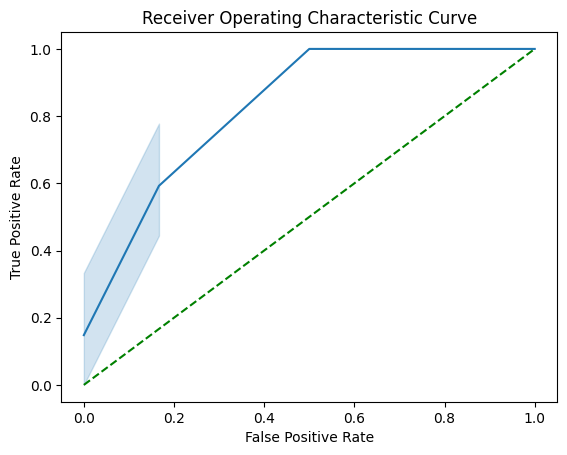

In [32]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()